In [132]:
# Testing demo from http://matplotlib.org/examples/statistics/boxplot_demo.html
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [133]:
# Load affinity table for UP, MID, DOWN
cl_dat = pd.read_csv('affin_run_type_val.csv')          #, usecols=list(range(0,19)) )

In [134]:
UMD_dat = cl_dat[cl_dat['Type'].str.contains('Ex, apo|Ex, X0|Ex, 0C|X0|0C|XC')]
UMD_dat.head()

,Run,Type,Val
0,UP,"Ex, apo",-2.0
1,UP,"Ex, apo",-2.4
2,UP,"Ex, apo",-0.9
3,MID,"Ex, apo",-7.2
4,MID,"Ex, apo",-8.8


In [143]:
col_lbls = ['Ex, apo', 'Ex, X0', 'X0_E-1', 'X0', 'X0_E01', 'Ex, 0C', '0C_E-1', '0C', '0C_E01', 'Ex, XC', 'X|XC','C|XC']

# Split file data into individual series:
dat_Exapo = UMD_dat[UMD_dat.Type=='Ex, apo']
dat_ExX0 = UMD_dat[UMD_dat.Type=='Ex, X0']
dat_X0Ei = UMD_dat[UMD_dat.Type=='X0_E-1']
dat_X0 = UMD_dat[UMD_dat.Type=='X0']
dat_X0En = UMD_dat[UMD_dat.Type=='X0_E01']
dat_Ex0C = UMD_dat[UMD_dat.Type=='Ex, 0C']
dat_0CEi = UMD_dat[UMD_dat.Type=='0C_E-1']
dat_0C = UMD_dat[UMD_dat.Type=='0C']
dat_0CEn = UMD_dat[UMD_dat.Type=='0C_E01']

#data = pd.DataFrame.combine(dat_Exapo, dat_ExX0, dat_X0Ei, dat_X0, dat_X0En, dat_Ex0C, dat_0CEi, dat_0C, dat_0CEn)

TypeError: unhashable type: 'slice'

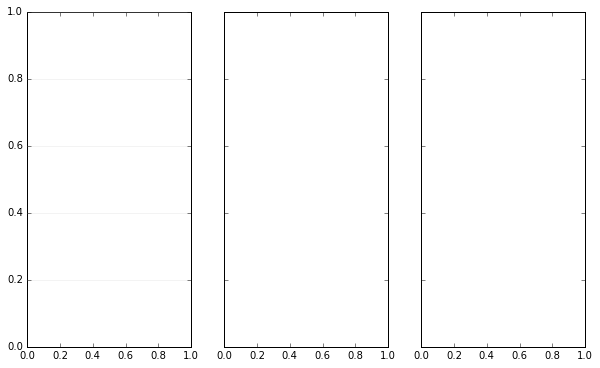

In [150]:
labels = list('DMU')
fs = 10  # fontsize

# demonstrate how to toggle the display of different elements:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 6), sharey=True)

#axes1 = fig.add_subplot(1,1,1)
axes[0].yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
axes[0].boxplot(dat_Exapo, labels=labels, showmeans=True)
#bp1 = axes[1].boxplot(dat_ExX0, labels=labels, showmeans=True)
#bp2 = axes[2].boxplot(dat_X0Ei, labels=labels, showmeans=True, meanline=True)

#bp = dat_Exapo.boxplot(column='Val', by='Run', grid=True)
#######
axes[0].set_title('E[x], apo', fontsize=fs)

axes[1].boxplot(dat_ExX0, labels=labels, showmeans=True)
axes[1].set_title('E[x], X0', fontsize=fs)

axes[2].boxplot(dat_X0, labels=labels, showmeans=True)
axes[2].set_title('X0', fontsize=fs)

for ax in axes.flatten():
    ax.set_yscale('log')
    #ax.set_yticklabels([])
fig.subplots_adjust(hspace=0.2)
plt.show()



In [154]:
dat_Exapo.boxplot?


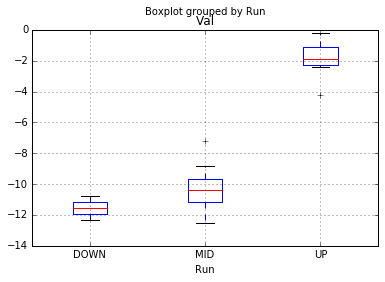

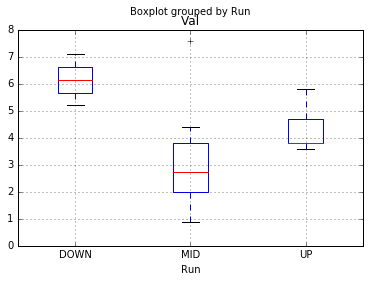

In [155]:
bp = dat_Exapo.boxplot(column='Val', by='Run', grid=True)
bp.set_title="..."#"E[x], apo"
bp = dat_ExX0.boxplot(column='Val', by='Run', grid=True)
bp.set_title="..."#"E[x], X0"

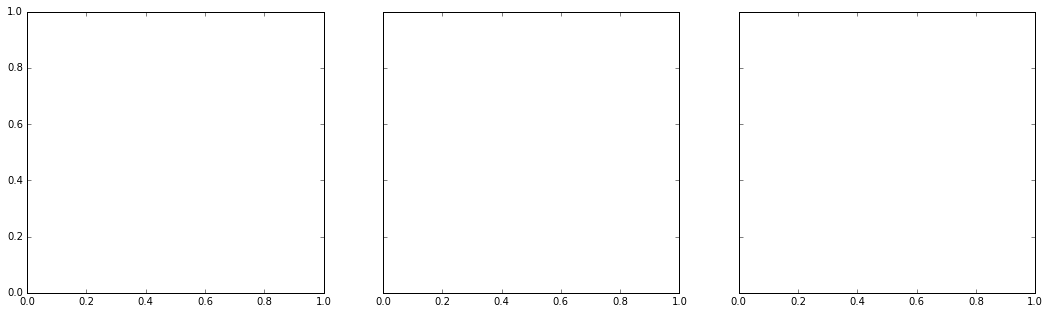

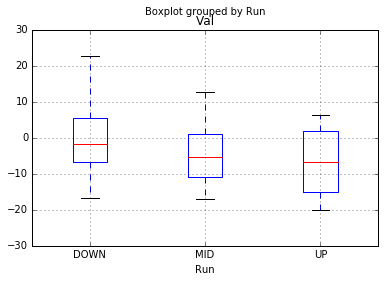

In [131]:
#from matplotlib.patches import Polygon
plt_labels = ('DOWN', 'MID', 'UP')
fs = 10  # fontsize

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6), sharey=True)

plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

axes[0]= UMD_dat.boxplot(column='Val', by='Run', grid=True)
#plt.boxplot(dat_Exapo,  notch=0, sym='+', vert=1, whis=1.5)
#plt.setp(bp['boxes'], color='black')
#plt.setp(bp['whiskers'], color='black')
#plt.setp(bp['fliers'], color='red', marker='+')


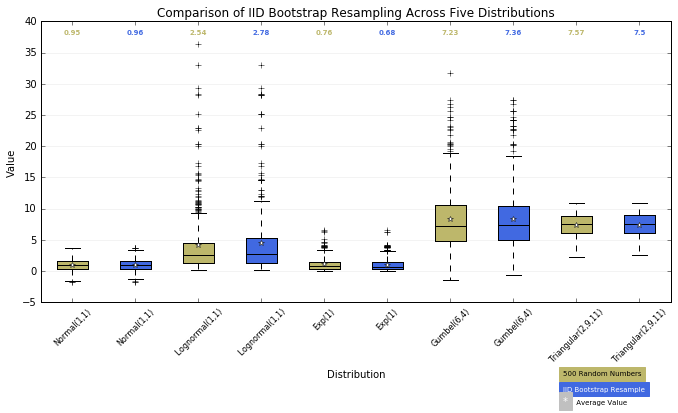

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# Generate some data from five different probability distributions,
# each with different characteristics. We want to play with how an IID
# bootstrap resample of the data preserves the distributional
# properties of the original sample, and a boxplot is one visual tool
# to make this assessment
numDists = 5
randomDists = ['Normal(1,1)', ' Lognormal(1,1)', 'Exp(1)', 'Gumbel(6,4)', 'Triangular(2,9,11)']
N = 500
np.random.seed(0)
norm = np.random.normal(1, 1, N)
logn = np.random.lognormal(1, 1, N)
expo = np.random.exponential(1, N)
gumb = np.random.gumbel(6, 4, N)
tria = np.random.triangular(2, 9, 11, N)

# Generate some random indices that we'll use to resample the original data
# arrays. For code brevity, just use the same random indices for each array
bootstrapIndices = np.random.randint(0, N - 1, N)
normBoot = norm[bootstrapIndices]
expoBoot = expo[bootstrapIndices]
gumbBoot = gumb[bootstrapIndices]
lognBoot = logn[bootstrapIndices]
triaBoot = tria[bootstrapIndices]

data = [norm, normBoot, logn, lognBoot, expo, expoBoot, gumb, gumbBoot, tria, triaBoot]

fig, ax1 = plt.subplots(figsize=(10, 6))
fig.canvas.set_window_title('A Boxplot Example')
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

bp = plt.boxplot(data, notch=0, sym='+', vert=1, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)

# Hide these grid behind plot objects
ax1.set_axisbelow(True)
ax1.set_title('Comparison of IID Bootstrap Resampling Across Five Distributions')
ax1.set_xlabel('Distribution')
ax1.set_ylabel('Value')

# Now fill the boxes with desired colors
boxColors = ['darkkhaki', 'royalblue']
numBoxes = numDists*2
medians = list(range(numBoxes))
for i in range(numBoxes):
    box = bp['boxes'][i]
    boxX = []
    boxY = []
    for j in range(5):
        boxX.append(box.get_xdata()[j])
        boxY.append(box.get_ydata()[j])
    boxCoords = list(zip(boxX, boxY))
    # Alternate between Dark Khaki and Royal Blue
    k = i % 2
    boxPolygon = Polygon(boxCoords, facecolor=boxColors[k])
    ax1.add_patch(boxPolygon)
    # Now draw the median lines back over what we just filled in
    med = bp['medians'][i]
    medianX = []
    medianY = []
    for j in range(2):
        medianX.append(med.get_xdata()[j])
        medianY.append(med.get_ydata()[j])
        plt.plot(medianX, medianY, 'k')
        medians[i] = medianY[0]
    # Finally, overplot the sample averages, with horizontal alignment
    # in the center of each box
    plt.plot([np.average(med.get_xdata())], [np.average(data[i])], color='w', marker='*', markeredgecolor='k')

# Set the axes ranges and axes labels
ax1.set_xlim(0.5, numBoxes + 0.5)
top = 40
bottom = -5
ax1.set_ylim(bottom, top)
xtickNames = plt.setp(ax1, xticklabels=np.repeat(randomDists, 2))
plt.setp(xtickNames, rotation=45, fontsize=8)

# Due to the Y-axis scale being different across samples, it can be
# hard to compare differences in medians across the samples. Add upper
# X-axis tick labels with the sample medians to aid in comparison
# (just use two decimal places of precision)
pos = np.arange(numBoxes) + 1
upperLabels = [str(np.round(s, 2)) for s in medians]
weights = ['bold', 'semibold']
for tick, label in zip(range(numBoxes), ax1.get_xticklabels()):
    k = tick % 2
    ax1.text(pos[tick], top - (top*0.05), upperLabels[tick],
             horizontalalignment='center', size='x-small', weight=weights[k], color=boxColors[k])

# Finally, add a basic legend
plt.figtext(0.80, 0.08, str(N) + ' Random Numbers',
            backgroundcolor=boxColors[0], color='black', weight='roman', size='x-small')
plt.figtext(0.80, 0.045, 'IID Bootstrap Resample',
            backgroundcolor=boxColors[1], color='white', weight='roman', size='x-small')
plt.figtext(0.80, 0.015, '*', backgroundcolor='silver', color='white', 
            weight='roman', size='medium')
plt.figtext(0.815, 0.013, ' Average Value', color='black', 
            weight='roman', size='x-small')

plt.show()